
Model Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35756
           1       0.80      0.62      0.70      1573

    accuracy                           0.98     37329
   macro avg       0.89      0.80      0.84     37329
weighted avg       0.98      0.98      0.98     37329



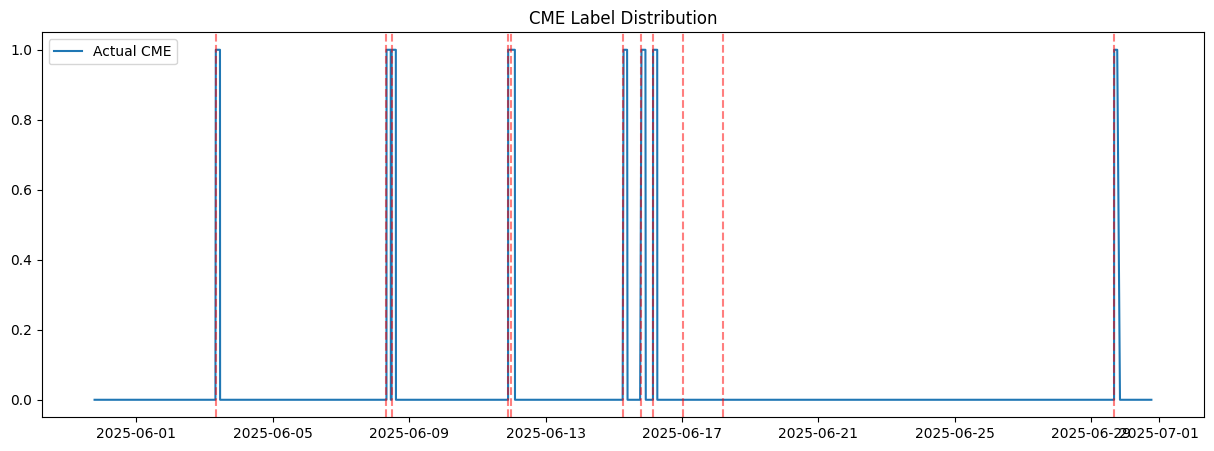

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from Scripts.data_loader import load_blk_data, load_th1_data
from Scripts.model import label_cme_occurrences, train_cme_model
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Load data
blk_df = load_blk_data()
th1_df = load_th1_data()

blk_df['time'] = pd.to_datetime(blk_df['time']).dt.tz_localize(None)
th1_df['time'] = pd.to_datetime(th1_df['time']).dt.tz_localize(None)

# Merge datasets on time
df = blk_df.merge(th1_df, on='time', how='inner')

# Load CACTus CME times (you can extract these from the raw text using your parser)
from Scripts.cactusHandler import parse_cactus_file
cme_times = parse_cactus_file('../data/cmecat.txt')

df_labeled = label_cme_occurrences(df, cme_times)

# Train model
model = train_cme_model(df_labeled)

# Visualize CME prediction
plt.figure(figsize=(15, 5))
plt.plot(df_labeled['time'], df_labeled['cme'], label="Actual CME")
for t in cme_times:
    plt.axvline(t, color='red', linestyle='--', alpha=0.5)
plt.title("CME Label Distribution")
plt.legend()
plt.show()


cme
0    178778
1      7867
Name: count, dtype: int64


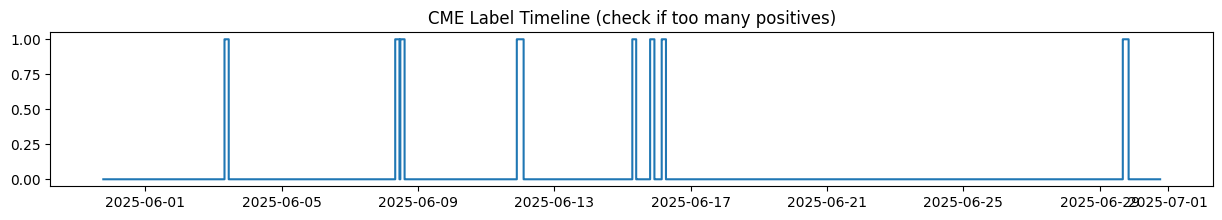

In [2]:
print(df_labeled['cme'].value_counts())
plt.figure(figsize=(15, 2))
plt.plot(df_labeled['time'], df_labeled['cme'], drawstyle='steps-post')
plt.title("CME Label Timeline (check if too many positives)")
plt.show()



Model Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35756
           1       0.80      0.62      0.70      1573

    accuracy                           0.98     37329
   macro avg       0.89      0.80      0.84     37329
weighted avg       0.98      0.98      0.98     37329



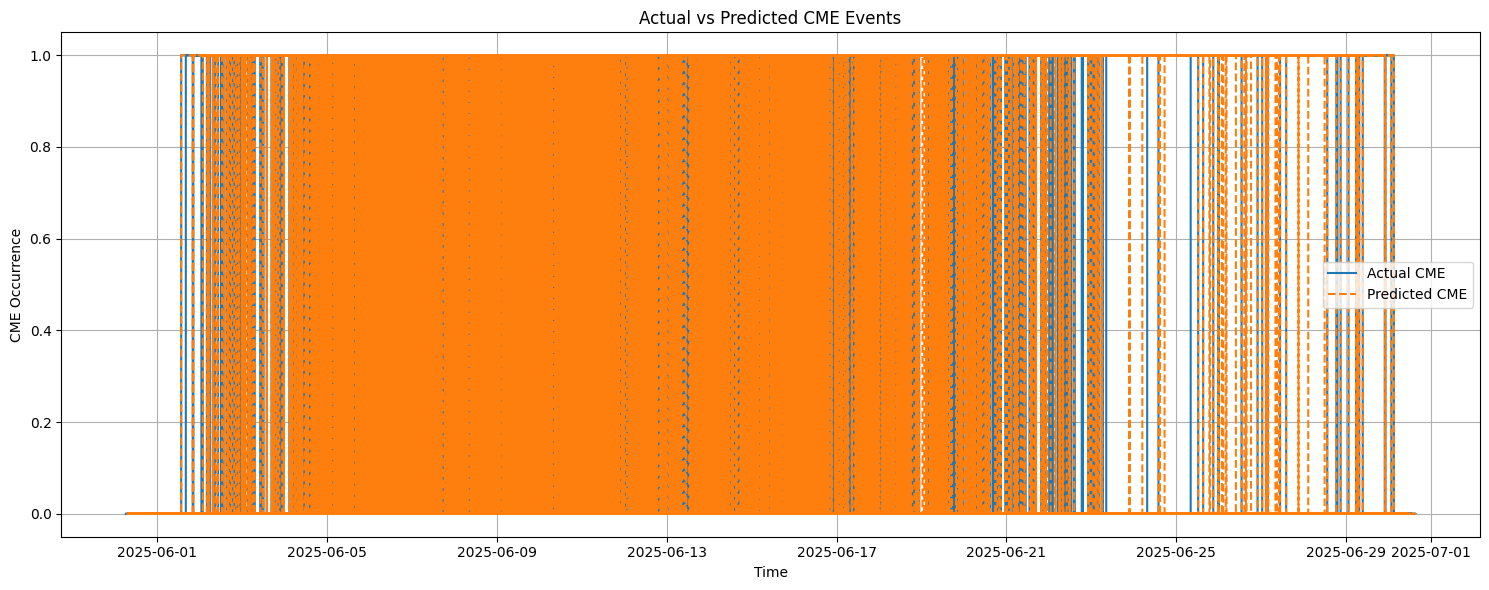

In [3]:
# Train model and get predictions
model, X_test, y_test, y_pred = train_cme_model(df_labeled)

# Plot
plt.figure(figsize=(15, 6))

# Time index for plotting
test_times = df_labeled.loc[y_test.index, 'time']

plt.plot(test_times, y_test.values, label="Actual CME", drawstyle='steps-mid')
plt.plot(test_times, y_pred, label="Predicted CME", linestyle='--', drawstyle='steps-mid')

plt.title("Actual vs Predicted CME Events")
plt.xlabel("Time")
plt.ylabel("CME Occurrence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
